# <font color='red'> Import libraries </font>

In [ ]:
# work with dataframes
import pandas as pd
import numpy as np

# we'll use this to store the a dataframe to csv at a later stage
import csv

# make HTTP requests to a specified URL
import requests

# web scraping library
from bs4 import BeautifulSoup

# time management
import time
from random import randint
# from collections import Counter

# regular expressions
import re

# io operations 
import os

# read  and write img links
import json

In [ ]:
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# <font color='red'> Visualization

In [ ]:
# import the cleaned data
df = pd.read_csv('/content/drive/MyDrive/Data Science/craigslistproject/cleaned_data_10_25_2021a.csv', sep='\t', engine='python')

In [ ]:
df.head()

,VIN,city,condition,cylinders,date time,drive,fuel,lat,long,odometer,pID,paint color,post_body,price,size,title status,transmission,type,date,time,weekday,dayOfWeek,year,make,model
0,NaN,dallas,excellent,6 cylinders,2021-10-24 21:23:00,rwd,gas,33.2362,-96.7954,136047,7.398758e+09,grey,2011 Jeep Grand Cherokee Overland LOADED with ...,14250,full-size,clean,automatic,SUV,2021-10-24,1900-01-01 21:23:00,6,Sunday,2011,JEEP,GRAND
1,NaN,dallas,like new,6 cylinders,2021-10-24 21:22:00,fwd,gas,32.7319,-96.9057,19487,7.398757e+09,white,HELLO EVERY ONE HERE IS 2019 CHEVROLET TRAVERS...,21900,full-size,rebuilt,automatic,SUV,2021-10-24,1900-01-01 21:22:00,6,Sunday,2019,CHEVROLET,TRAVERSE
2,NaN,dallas,excellent,4 cylinders,2021-10-24 21:17:00,fwd,gas,33.1377,-96.7524,170000,7.398756e+09,white,MANUAL TRANSMISSION,3700,mid-size,clean,manual,SUV,2021-10-24,1900-01-01 21:17:00,6,Sunday,2005,MAZDA,TRIBUTE
3,NaN,dallas,like new,4 cylinders,2021-10-24 21:06:00,fwd,gas,32.7319,-96.9057,33448,7.398754e+09,white,HELLO EVERY ONE HERE IS 2019 GMC ACADIA FOR SA...,19700,full-size,rebuilt,automatic,SUV,2021-10-24,1900-01-01 21:06:00,6,Sunday,2019,GMC,ACADIA
4,NaN,dallas,excellent,4 cylinders,2021-10-24 20:50:00,fwd,gas,33.0752,-96.7843,26300,7.398750e+09,silver,Excellent Condition CRV for sale please call t...,28990,NaN,clean,automatic,SUV,2021-10-24,1900-01-01 20:50:00,6,Sunday,2017,HONDA,CIVIC


In [ ]:
df['city'] = df['city'].astype('category')
df['condition'] = df['condition'].astype('category')
df['cylinders'] = df['cylinders'].astype('category')
df['drive'] = df['drive'].astype('category')
df['fuel'] = df['fuel'].astype('category')
df['paint color'] = df['paint color'].astype('category')
df['size'] = df['size'].astype('category')
df['title status'] = df['title status'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['type'] = df['type'].astype('category')
df['dayOfWeek'] = df['dayOfWeek'].astype('category') 
df['make'] = df['make'].astype('category') 
df['date time'] = pd.to_datetime(df['date time'])
df['time'] = pd.to_datetime(df['time'])

# preview the new data types
df.dtypes  

VIN                     object
city                  category
condition             category
cylinders             category
date time       datetime64[ns]
drive                 category
fuel                  category
lat                    float64
long                   float64
odometer                 int64
pID                    float64
paint color           category
post_body               object
price                    int64
size                  category
title status          category
transmission          category
type                  category
date                    object
time            datetime64[ns]
weekday                  int64
dayOfWeek             category
year                     int64
make                  category
model                   object
dtype: object

In [ ]:
# Set the default color cycle
from matplotlib import cycler
colors = cycler('color', ['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB' ])
plt.rc('axes', titlesize=15, labelsize=10, facecolor = '#E6E6E6', edgecolor = 'none', axisbelow = True, grid = True, prop_cycle = colors)
plt.rc('grid', color = 'w', linestyle = 'solid')
# plt.rc('xtick', direction = 'out', color = '#35373b', labelsize=10)
# plt.rc('ytick', direction = 'out', color = '#35373b', labelsize=10)
plt.rc('patch', edgecolor = '#E6E6E6')
plt.rc('lines', linewidth = 2)
# plt.rc('font', weight='bold')


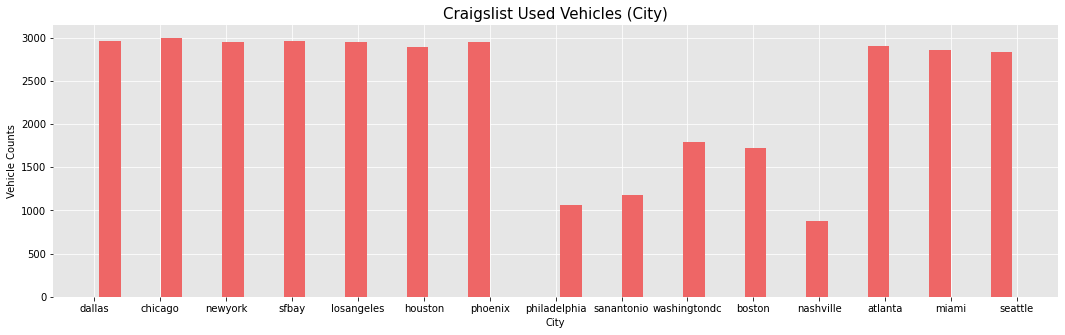

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,5))
# plot histogram
fig = ax.hist(df['city'],rwidth=0.7,bins=30)
# set title and labels
fig = ax.set_title('Craigslist Used Vehicles (City)')
fig = ax.set_xlabel('City')
fig = ax.set_ylabel('Vehicle Counts')

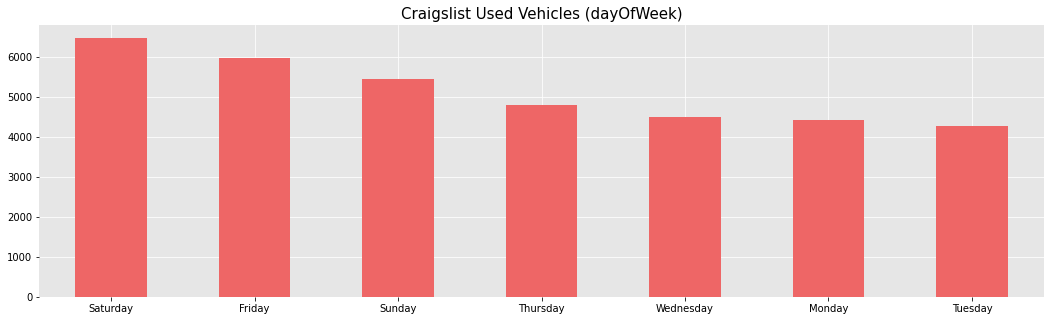

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,5))
fig = df['dayOfWeek'].value_counts(sort = True)\
                     .plot.bar(title='Craigslist Used Vehicles (dayOfWeek)')
fig = plt.xticks(rotation=0)

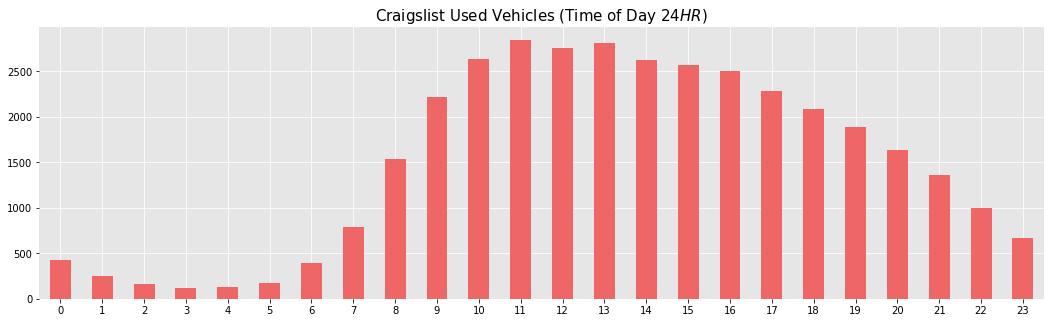

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,5))
fig = df.time.dt.hour.value_counts(sort = False).plot.bar(title="Craigslist Used Vehicles (Time of Day $\\it{24HR}$)")
fig = plt.xticks(rotation=0)

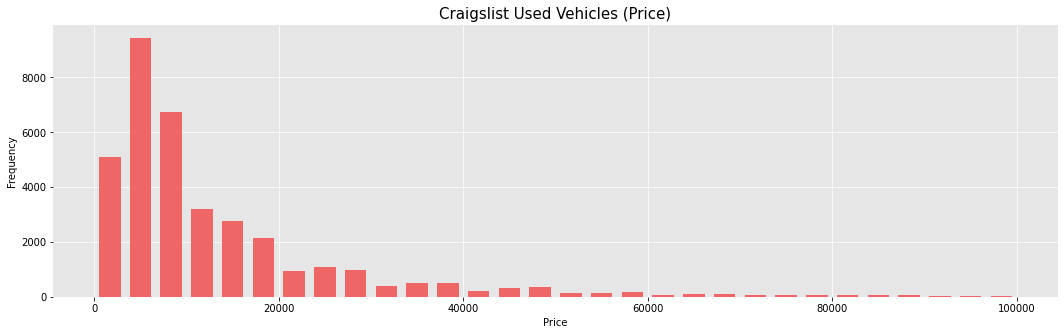

In [ ]:
# remove outliers in price
# q = dfs["price"].quantile(0.99)
# dfq = dfs[dfs["price"] < q]

fig, ax = plt.subplots(1,1,figsize=(18,5))
# plot histogram
fig = ax.hist(df['price'],rwidth=0.7,bins=30,alpha = 1)
# set title and labels
fig = ax.set_title('Craigslist Used Vehicles (Price)')
fig = ax.set_xlabel('Price')
fig = ax.set_ylabel('Frequency')


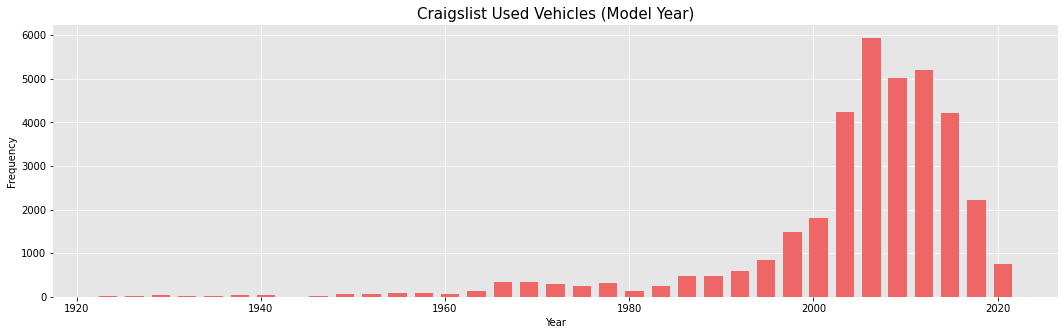

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,5))
# plot histogram
fig = ax.hist(df['year'],rwidth=0.7,bins=35)
# set title and labels
fig = ax.set_title('Craigslist Used Vehicles (Model Year)')
fig = ax.set_xlabel('Year')
fig = ax.set_ylabel('Frequency')


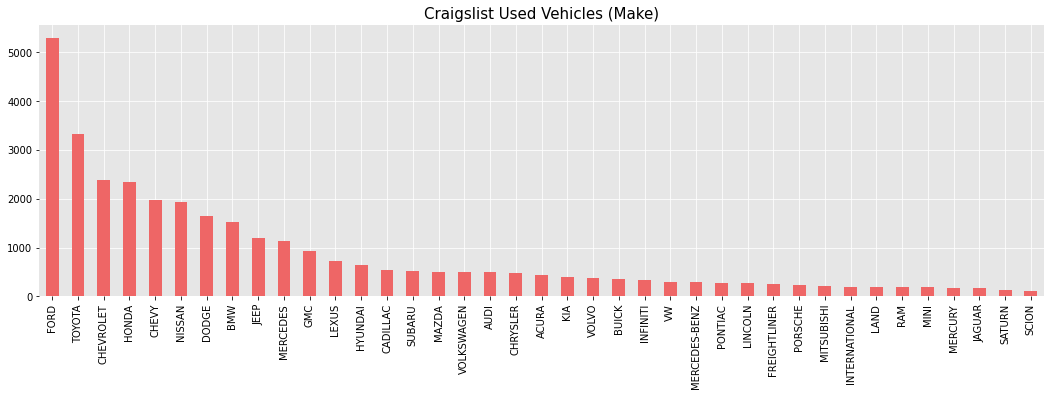

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,5))

ax = df['make'].value_counts(sort = True)[:39].plot.bar(title='Craigslist Used Vehicles (Make)')

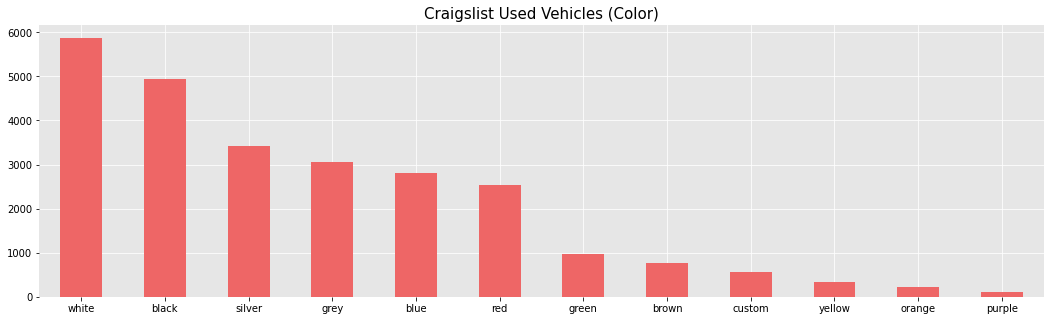

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,5))
fig = df[df['paint color'].notna()]['paint color'].value_counts(sort = True).plot.bar(title='Craigslist Used Vehicles (Color)')
fig = plt.xticks(rotation=0)

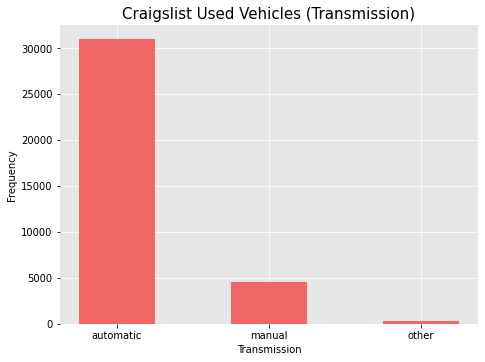

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(7.5,5.5)) 
# count the occurrence of each class 
data = df['transmission'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
fig = ax.bar(points, frequency, width=0.5) 
# set title and labels 
fig = ax.set_title('Craigslist Used Vehicles (Transmission)') 
fig = ax.set_xlabel('Transmission') 
fig = ax.set_ylabel('Frequency')

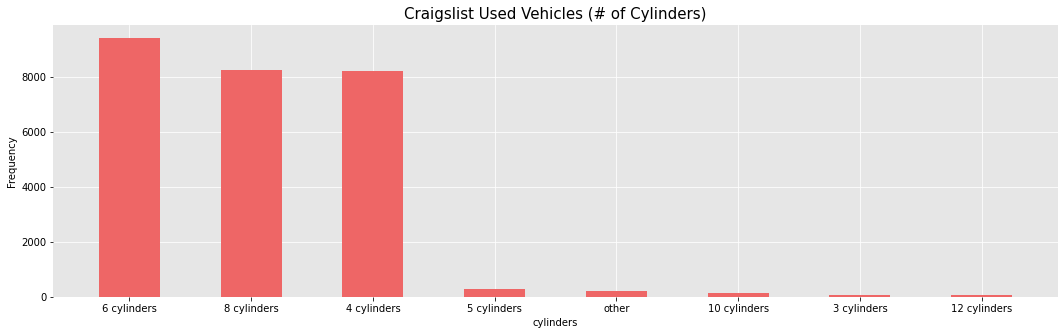

In [ ]:
# fig, ax = plt.subplots() 
fig, ax = plt.subplots(1,1,figsize=(18,5))
# count the occurrence of each class 
data = df['cylinders'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
fig = ax.bar(points, frequency, width=0.5) 
# set title and labels 
fig = ax.set_title('Craigslist Used Vehicles (# of Cylinders)') 
fig = ax.set_xlabel('cylinders') 
fig = ax.set_ylabel('Frequency')

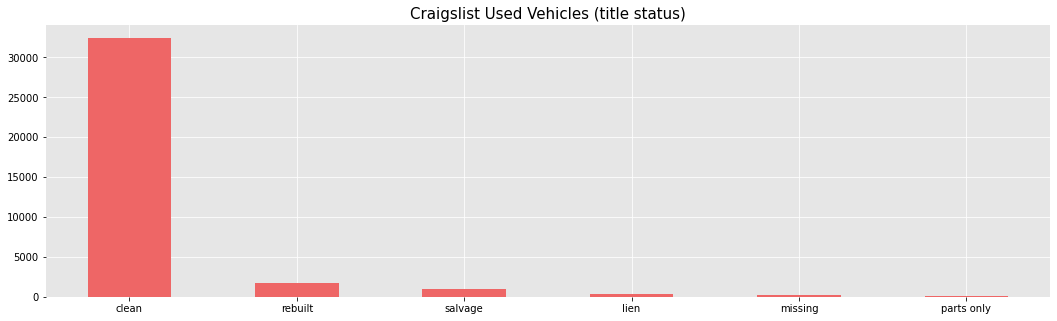

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,5))
fig = df['title status'].value_counts(sort = True)[:39].plot.bar(title='Craigslist Used Vehicles (title status)', width=0.5)
fig = plt.xticks(rotation=0)

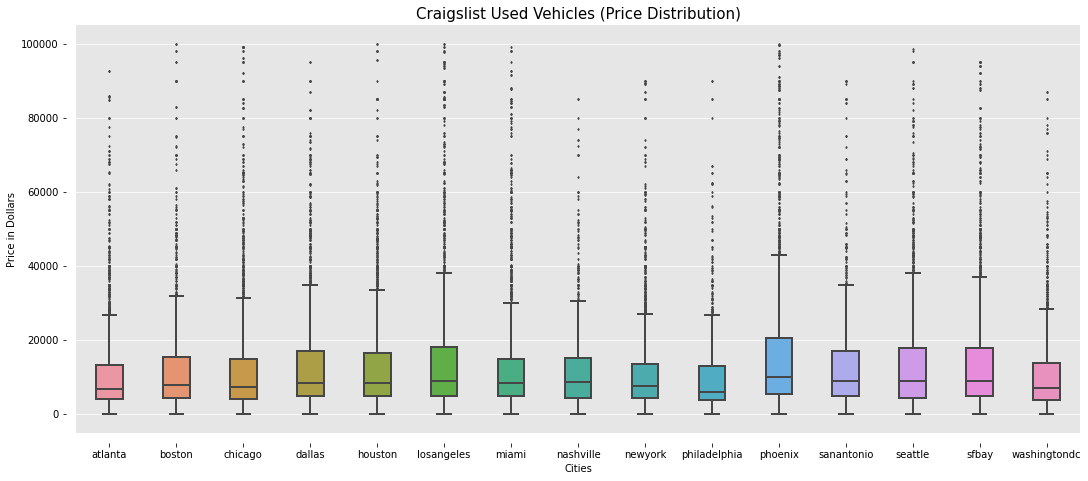

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,7.5))
sns.boxplot(x="city", y="price", data=df, width=0.4, fliersize=1.5)
sns.despine(offset=10, trim=True)
fig = ax.set_title('Craigslist Used Vehicles (Price Distribution)') 
fig = ax.set_xlabel('Cities') 
fig = ax.set_ylabel('Price in Dollars')

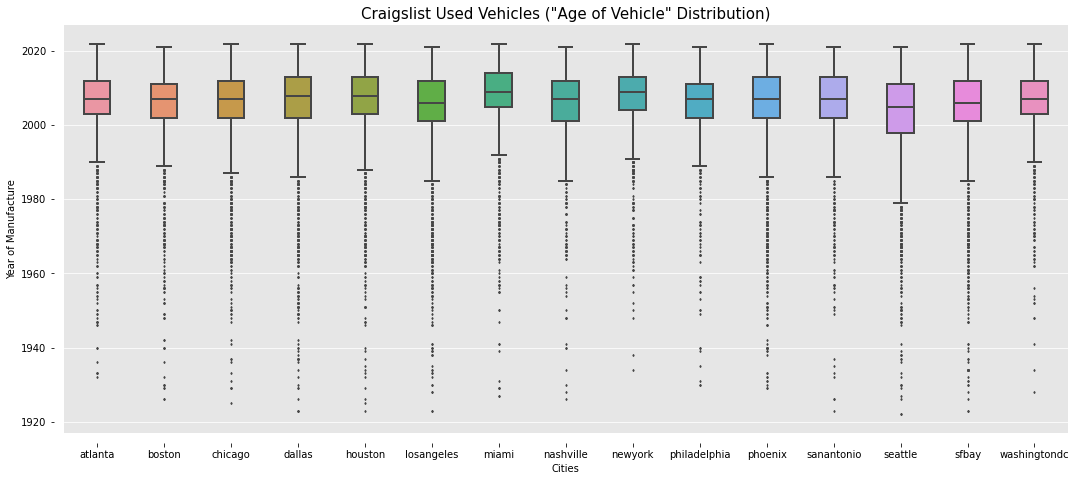

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(18,7.5))
sns.boxplot(x="city", y="year", data=df, width=0.4, fliersize=1.5)
sns.despine(offset=10, trim=True)
fig = ax.set_title('Craigslist Used Vehicles ("Age of Vehicle" Distribution)') 
fig = ax.set_xlabel('Cities') 
fig = ax.set_ylabel('Year of Manufacture')

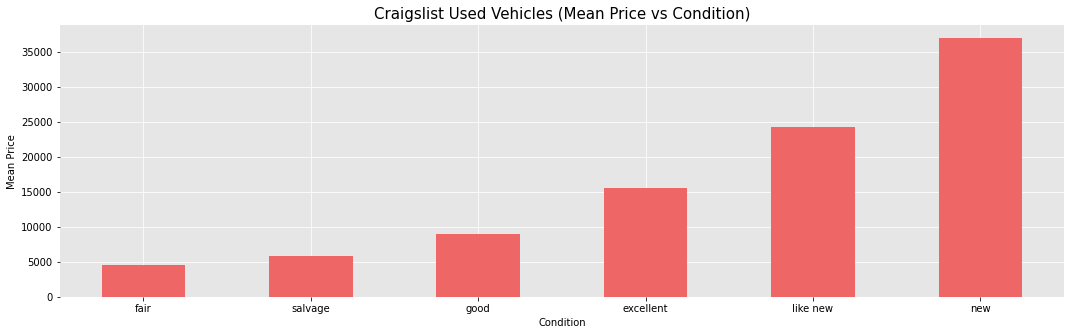

In [ ]:

dfg = df.groupby(['condition'])['price'].mean().sort_values()
fig = dfg.plot(kind='bar', title='Craigslist Used Vehicles (Mean Price vs Condition)', ylabel='Mean Price',
         xlabel='Condition', figsize=(18,5))
fig = plt.xticks(rotation=0)

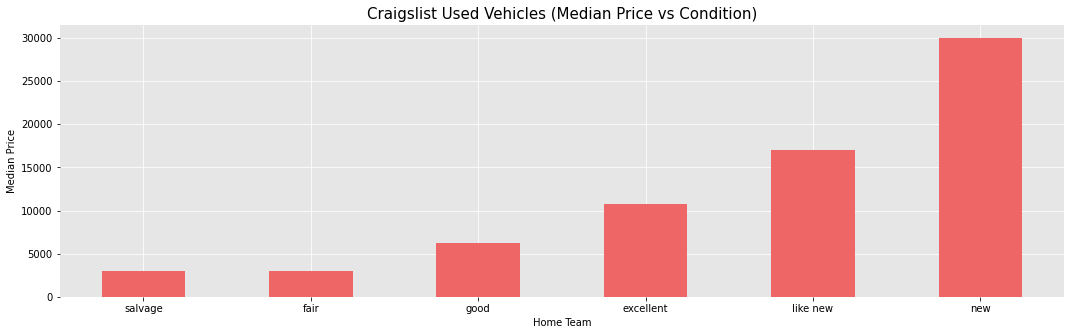

In [ ]:
dfg = df.groupby(['condition'])['price'].median().sort_values()
fig = dfg.plot(kind='bar', title='Craigslist Used Vehicles (Median Price vs Condition)', ylabel='Median Price',
         xlabel='Home Team', figsize=(18,5))
fig = plt.xticks(rotation=0)

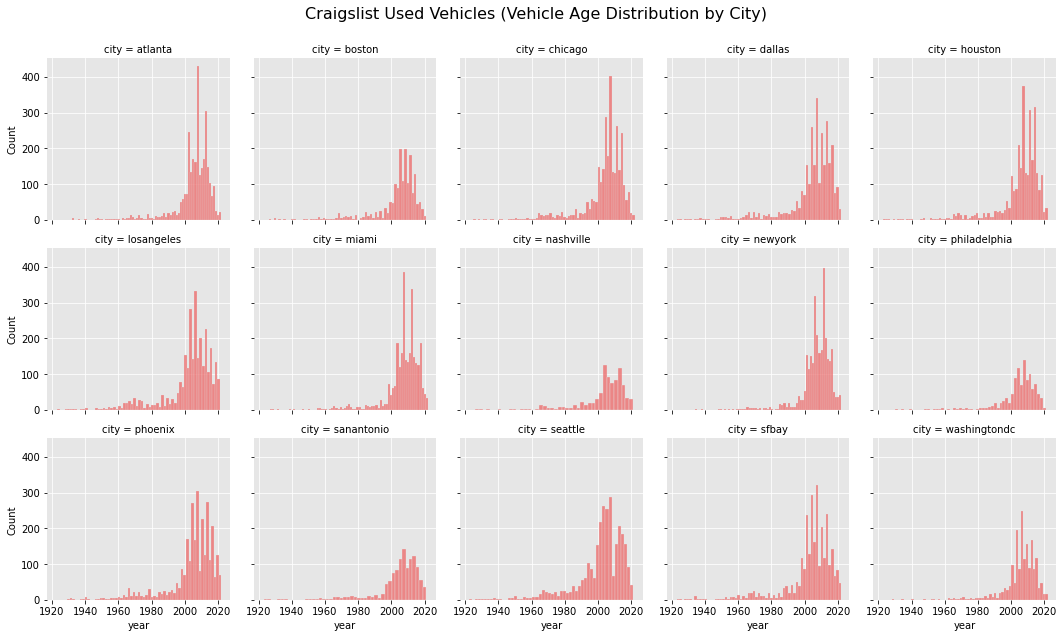

In [ ]:
g = sns.FacetGrid(df, col="city", col_wrap=5)
fig = g.map(sns.histplot, "year")
fig = g.fig.subplots_adjust(top=0.9)
fig = g.fig.suptitle('Craigslist Used Vehicles (Vehicle Age Distribution by City)', fontsize=16)

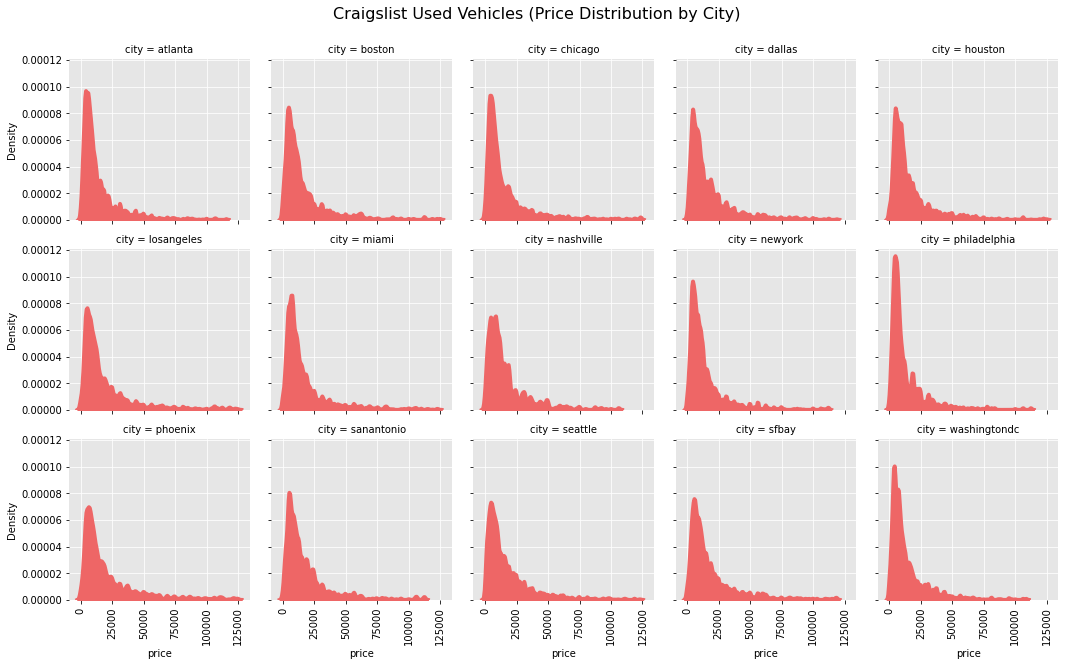

In [ ]:
g = sns.FacetGrid(df, col="city", col_wrap=5)
g.map(sns.kdeplot, "price", shade=True, alpha=1, lw=1.5, bw_adjust=0.2)
g.map(sns.kdeplot, "price", lw=4, bw_adjust=0.2)
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
fig = g.fig.subplots_adjust(top=0.9)
fig = g.fig.suptitle('Craigslist Used Vehicles (Price Distribution by City)', fontsize=16)

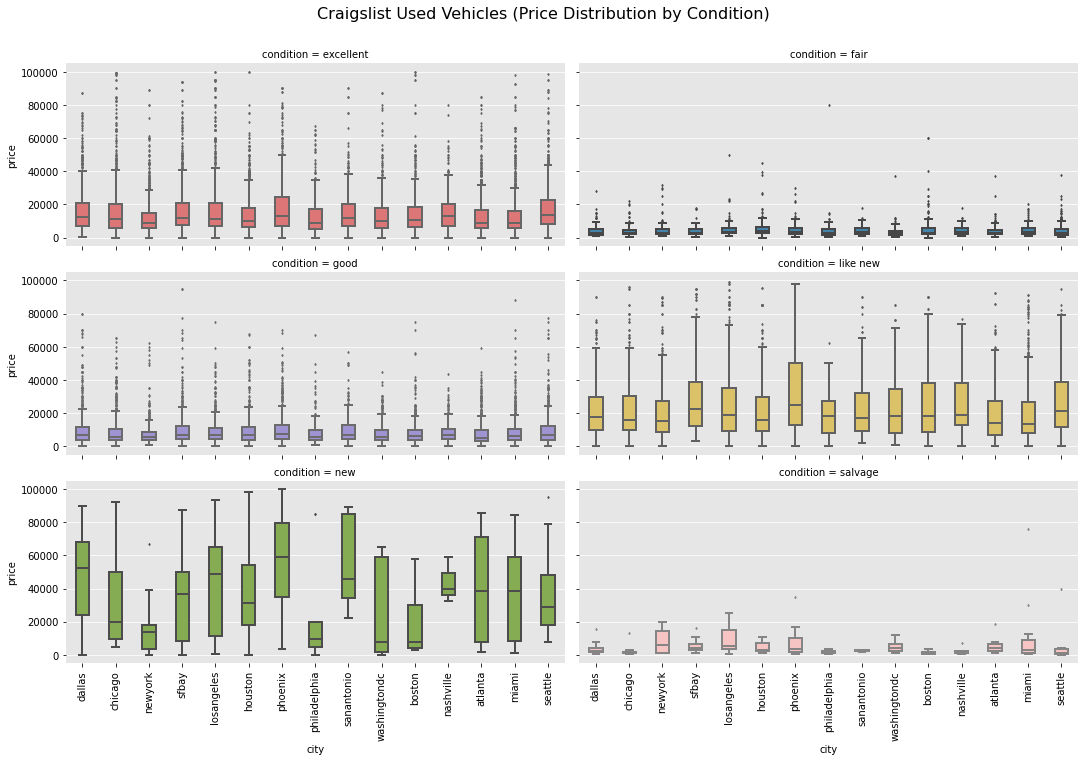

In [ ]:
def fixed_boxplot(*args, label=None, **kwargs):
    sns.boxplot(*args, **kwargs, labels=[label])

import warnings
warnings.filterwarnings('ignore')
    
g = sns.FacetGrid(df, col="condition", hue='condition', col_wrap=2, height=3.3, aspect=2.3)
g.map(fixed_boxplot, "city", "price",order=['dallas','chicago', 'newyork', 'sfbay', 'losangeles', \
        'houston', 'phoenix', 'philadelphia', 'sanantonio', 'washingtondc',\
       'boston', 'nashville', 'atlanta', 'miami', 'seattle'], width=0.4, fliersize=1.5)

g.set_xticklabels(rotation=90)
fig = g.fig.subplots_adjust(top=0.9)
fig = g.fig.suptitle('Craigslist Used Vehicles (Price Distribution by Condition)', fontsize=16)

warnings.simplefilter("always")

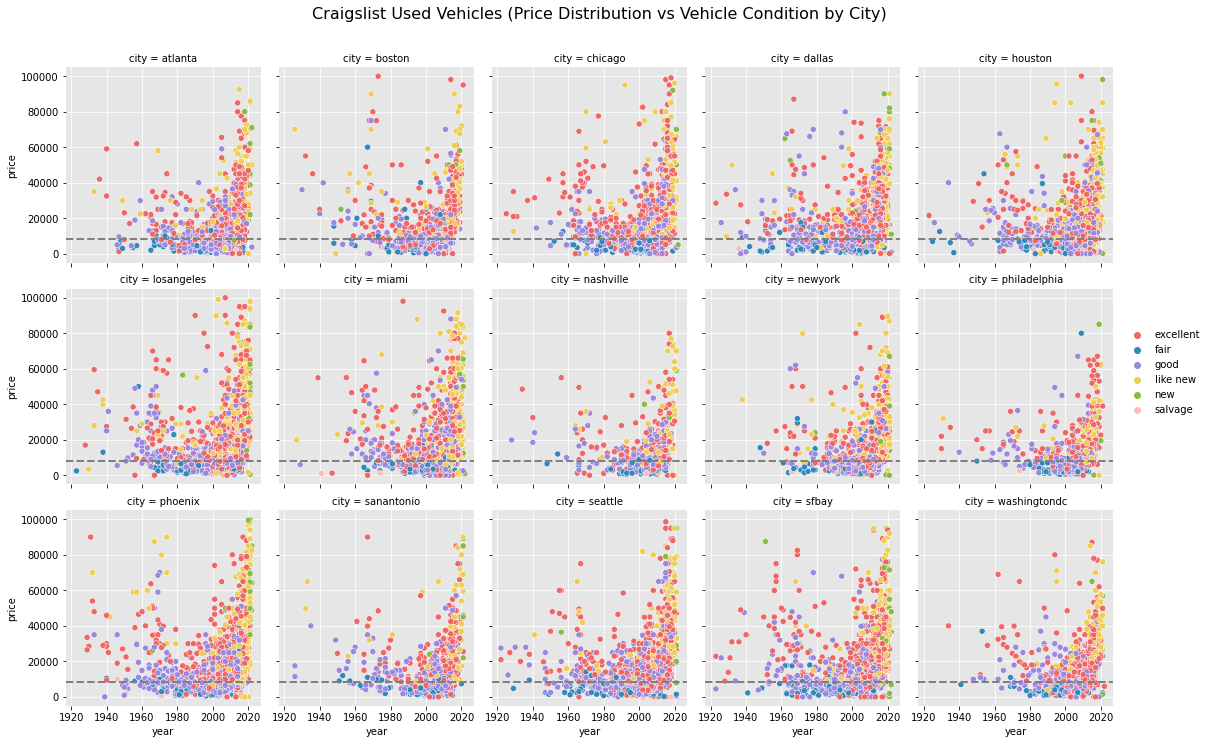

In [ ]:
g = sns.FacetGrid(df, col="city", col_wrap=5, height=3.5, aspect=0.9)
g.map_dataframe(sns.scatterplot, x="year", y="price", hue="condition")
g.refline(y=df["price"].median())
g.add_legend()
fig = g.fig.subplots_adjust(top=0.9)
fig = g.fig.suptitle('Craigslist Used Vehicles (Price Distribution vs Vehicle Condition by City)', fontsize=16)

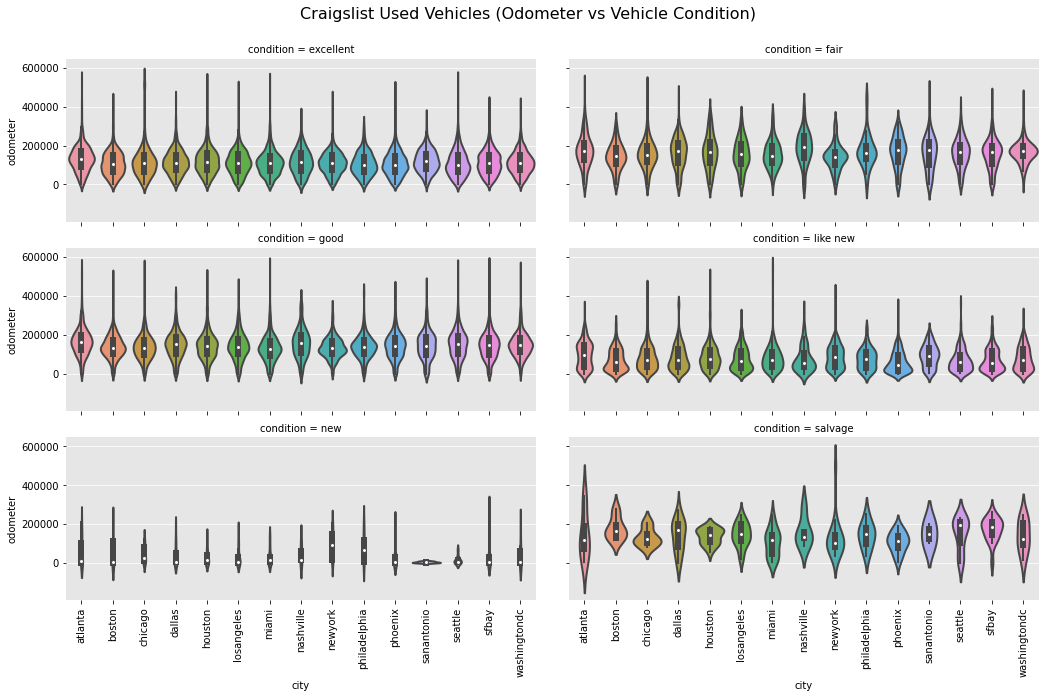

In [ ]:
# remove outliers in odometer
r = df["odometer"].quantile(0.99)
dfr = df[df["odometer"] < r]

g = sns.catplot(x="city", y="odometer", col="condition",
                data=dfr, kind="violin",col_wrap=2,
                height=3, aspect=2.5, width=0.9, fliersize=1.5);
g.set_xticklabels(rotation=90)
fig = g.fig.subplots_adjust(top=0.9)
fig = g.fig.suptitle('Craigslist Used Vehicles (Odometer vs Vehicle Condition)', fontsize=16)

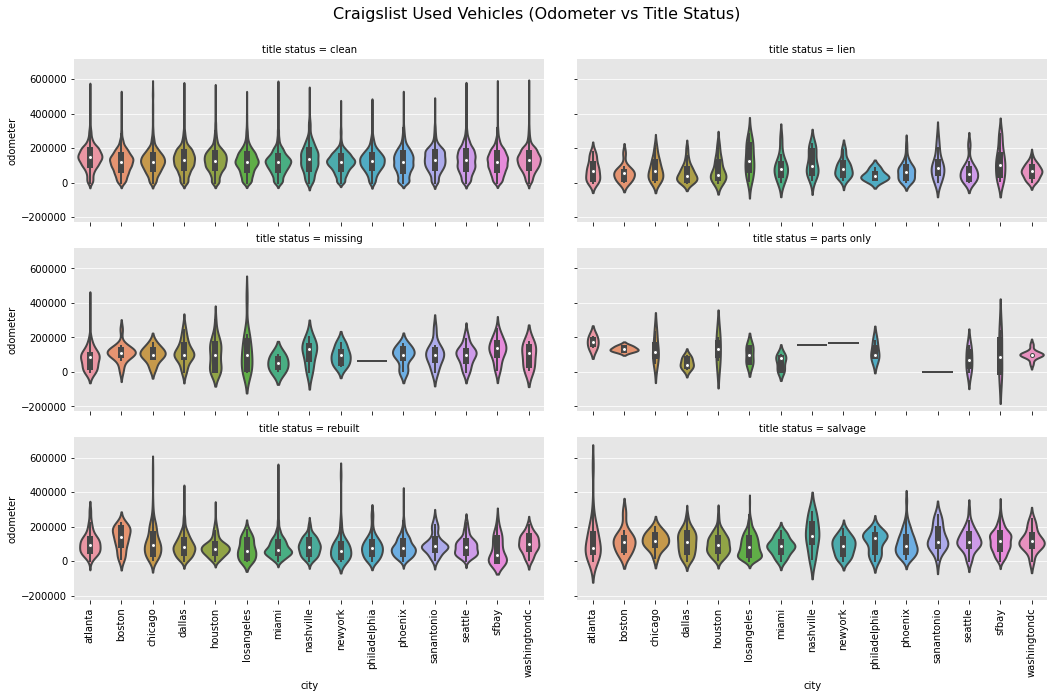

In [ ]:
g = sns.catplot(x="city", y="odometer", col="title status",
                data=dfr, kind="violin",col_wrap=2,
                height=3, aspect=2.5, width=0.9, fliersize=1.5);
g.set_xticklabels(rotation=90)
fig = g.fig.subplots_adjust(top=0.9)
fig = g.fig.suptitle('Craigslist Used Vehicles (Odometer vs Title Status)', fontsize=16)

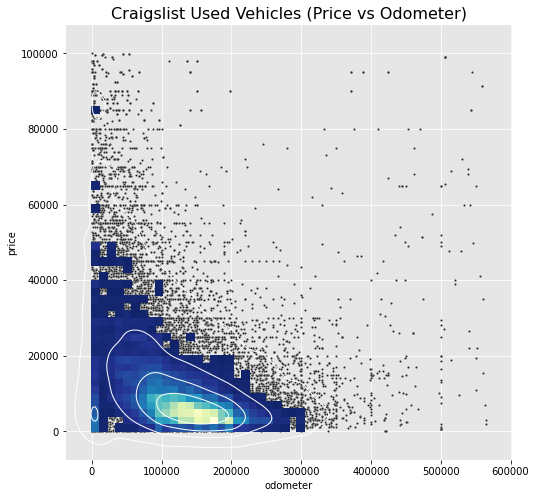

In [ ]:
# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(8, 8))
fig = sns.scatterplot(x='odometer', y='price', s=5, color=".15", data=dfr).set_title('Craigslist Used Vehicles (Price vs Odometer)', fontsize=16)
fig = sns.histplot(x='odometer', y='price', bins=50, pthresh=.1, cmap="YlGnBu_r", data=dfr)
fig = sns.kdeplot(x='odometer', y='price', levels=5, color="w", linewidths=1, data=dfr)

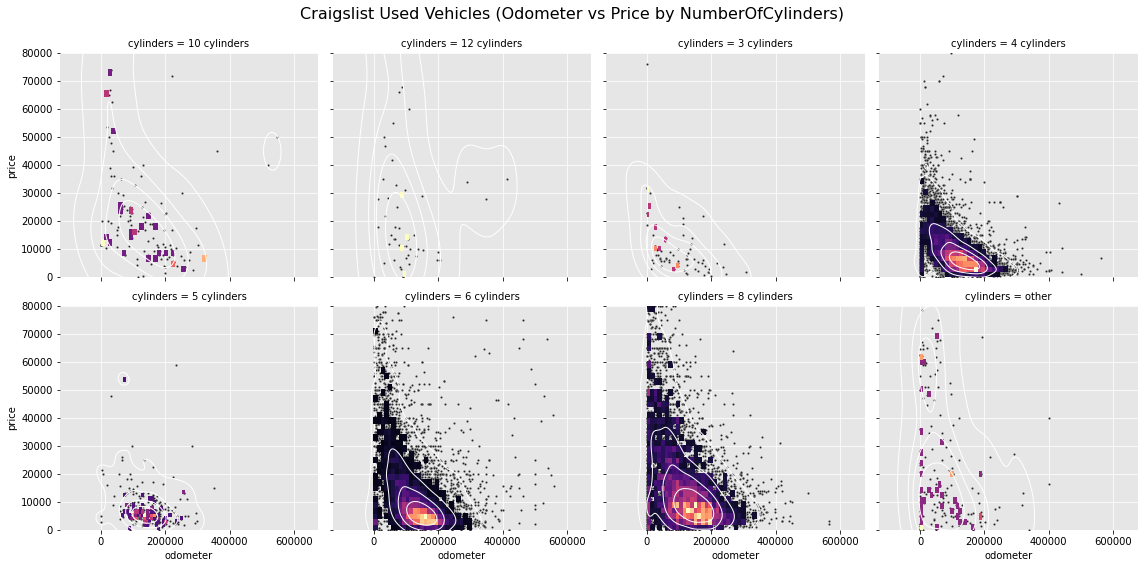

In [ ]:
g = sns.FacetGrid(dfr, col="cylinders", col_wrap=4, height=4, ylim=(0, 80000))
g.map(sns.scatterplot, "odometer", "price", s=5, color=".15")
g.map(sns.histplot, "odometer", "price", bins=50, pthresh=.1, cmap="magma")
g.map(sns.kdeplot, "odometer", "price", levels=5, color="w", linewidths=1)
fig = g.fig.subplots_adjust(top=0.9)
fig = g.fig.suptitle('Craigslist Used Vehicles (Odometer vs Price by NumberOfCylinders)', fontsize=16)

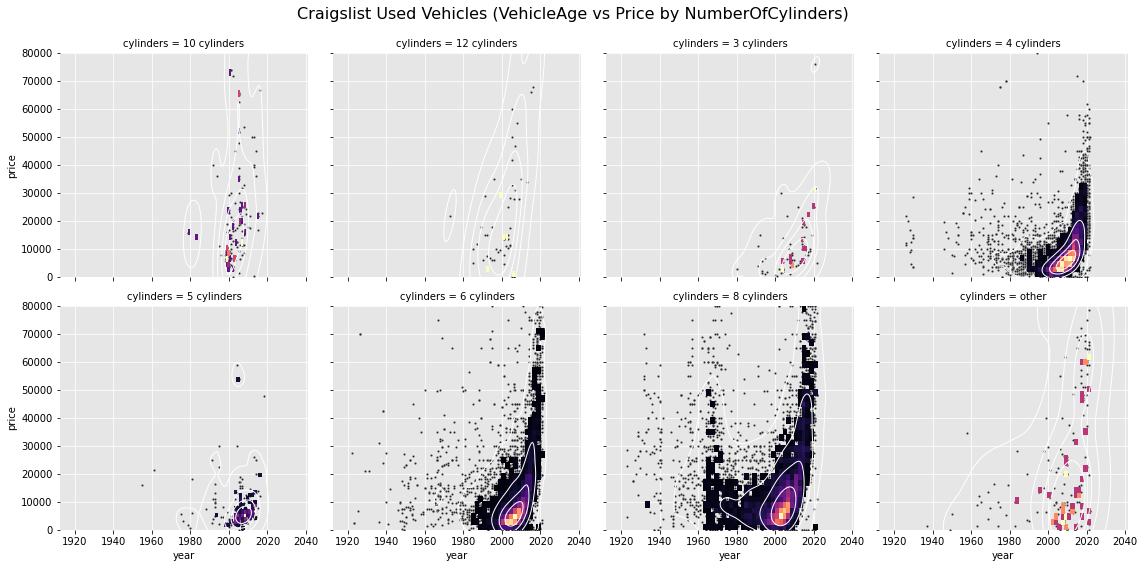

In [ ]:
g = sns.FacetGrid(dfr, col="cylinders", col_wrap=4, height=4, ylim=(0, 80000))
g.map(sns.scatterplot, "year", "price", s=5, color=".15")
g.map(sns.histplot, "year", "price", bins=50, pthresh=.1, cmap="magma")
g.map(sns.kdeplot, "year", "price", levels=5, color="w", linewidths=1)
fig = g.fig.subplots_adjust(top=0.9)
fig = g.fig.suptitle('Craigslist Used Vehicles (VehicleAge vs Price by NumberOfCylinders)', fontsize=16)

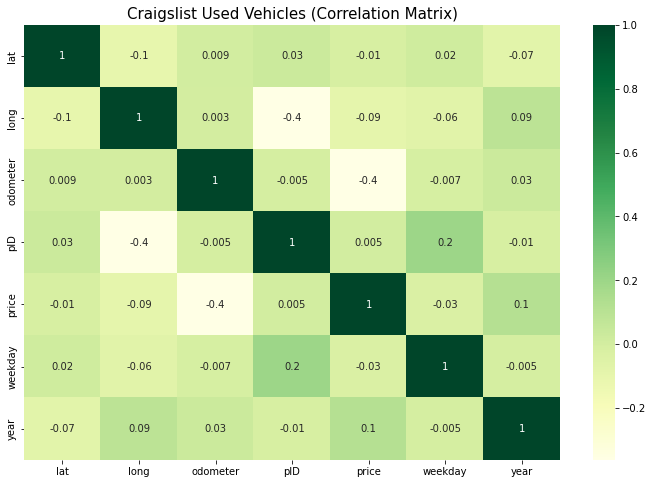

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
fig = sns.heatmap(dfr.select_dtypes(include=np.number).corr(), cmap="YlGn", annot=True, fmt='.1g')
fig.set_title('Craigslist Used Vehicles (Correlation Matrix)')
plt.show()

In [ ]:
# Categorical labels

df_cat=dfr

temp = df_cat[[ 'condition', 'cylinders', 'drive', 'fuel',
       'paint color', 'size', 'title status', 'transmission', 'type', 'make']].apply(lambda col:pd.Categorical(col).codes)
df_cat = pd.concat([df_cat, temp],axis=1)
print(df_cat.shape, dfr.shape)
df_cat.columns

(35527, 35) (35527, 25)


Index(['VIN', 'city', 'condition', 'cylinders', 'date time', 'drive', 'fuel',
       'lat', 'long', 'odometer', 'pID', 'paint color', 'post_body', 'price',
       'size', 'title status', 'transmission', 'type', 'date', 'time',
       'weekday', 'dayOfWeek', 'year', 'make', 'model', 'condition',
       'cylinders', 'drive', 'fuel', 'paint color', 'size', 'title status',
       'transmission', 'type', 'make'],
      dtype='object')

In [ ]:
# Rename duplicate columns
from collections import defaultdict
renamer = defaultdict()

for column_name in df_cat.columns[df_cat.columns.duplicated(keep=False)].tolist():
    if column_name not in renamer:
        renamer[column_name] = [column_name+'_0']
    else:
        renamer[column_name].append(column_name +'_'+str(len(renamer[column_name])))

defaultdict(None, {'b': ['b_0', 'b_1', 'b_2', 'b_3'], 'c': ['c_0', 'c_1']})

df_cat.rename(
    columns=lambda column_name: renamer[column_name].pop(0)
    if column_name in renamer 
    else column_name , inplace=True)   

In [ ]:
df_cat.columns

Index(['VIN', 'city', 'condition_0', 'cylinders_0', 'date time', 'drive_0',
       'fuel_0', 'lat', 'long', 'odometer', 'pID', 'paint color_0',
       'post_body', 'price', 'size_0', 'title status_0', 'transmission_0',
       'type_0', 'date', 'time', 'weekday', 'dayOfWeek', 'year', 'make_0',
       'model', 'condition_1', 'cylinders_1', 'drive_1', 'fuel_1',
       'paint color_1', 'size_1', 'title status_1', 'transmission_1', 'type_1',
       'make_1'],
      dtype='object')

In [ ]:
df_cat.head(3)

,VIN,city,condition_0,cylinders_0,date time,drive_0,fuel_0,lat,long,odometer,pID,paint color_0,post_body,price,size_0,title status_0,transmission_0,type_0,date,time,weekday,dayOfWeek,year,make_0,model,condition_1,cylinders_1,drive_1,fuel_1,paint color_1,size_1,title status_1,transmission_1,type_1,make_1
0,NaN,dallas,excellent,6 cylinders,2021-10-24 21:23:00,rwd,gas,33.2362,-96.7954,136047,7.398758e+09,grey,2011 Jeep Grand Cherokee Overland LOADED with ...,14250,full-size,clean,automatic,SUV,2021-10-24,1900-01-01 21:23:00,6,Sunday,2011,JEEP,GRAND,0,5,2,2,5,1,0,0,0,480
1,NaN,dallas,like new,6 cylinders,2021-10-24 21:22:00,fwd,gas,32.7319,-96.9057,19487,7.398757e+09,white,HELLO EVERY ONE HERE IS 2019 CHEVROLET TRAVERS...,21900,full-size,rebuilt,automatic,SUV,2021-10-24,1900-01-01 21:22:00,6,Sunday,2019,CHEVROLET,TRAVERSE,3,5,1,2,10,1,4,0,0,255
2,NaN,dallas,excellent,4 cylinders,2021-10-24 21:17:00,fwd,gas,33.1377,-96.7524,170000,7.398756e+09,white,MANUAL TRANSMISSION,3700,mid-size,clean,manual,SUV,2021-10-24,1900-01-01 21:17:00,6,Sunday,2005,MAZDA,TRIBUTE,0,3,1,2,10,2,0,1,0,544


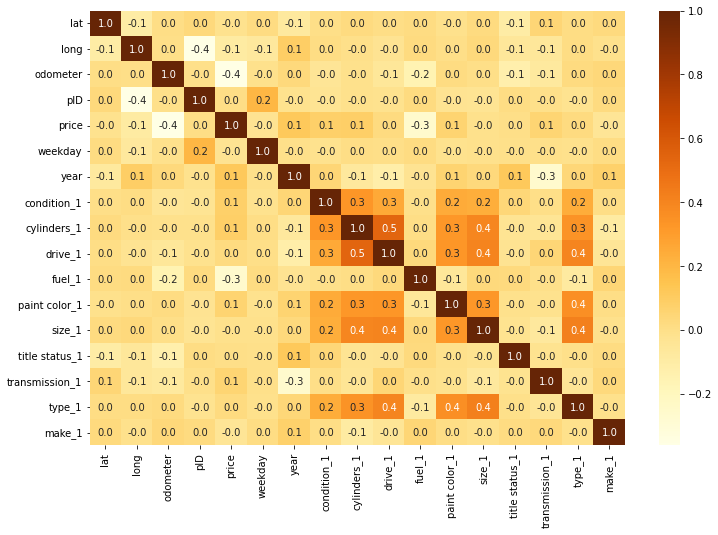

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cat.select_dtypes(include=np.number).corr(), cmap="YlOrBr", annot=True, fmt='.1f')
fig.set_title('Craigslist Used Vehicles (Correlation Matrix 2)')
plt.show()